# Comparison with the results of [Grabert et al, 2016](https://www.nature.com/articles/nn.4222#methods)

Data of [Grabert et al, 2016](https://www.nature.com/articles/nn.4222#methods): Affymetrix probes

# Loads

## Libraries and functions

In [91]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [164]:
source("functions.R")

## Data

In [52]:
load("../results/dge/norm_counts.RData")

Get the data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE62420 and clean it:
1. Transform the Affymetrix probe set names
2. Transform the Affymetrix probe set into a Gene symbol
3. Conserve only the probes with a corresponding gene symbol
4. Aggregate by gene symbol (several probes corresponding to the same gene symbol) by summing
5. Remplace some columns names (the ones with GEO id) by more meaningful names (from their description on GEO page)

In [49]:
# Download from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE62420
dest = "../data/GSE62420_Normalization_all_ages_microglia.txt.gz"
download.file("https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE62420&format=file&file=GSE62420%5FNormalization%5Fall%5Fages%5Fmicroglia%2Etxt%2Egz",
              dest)
# Import the data
GSE62420 = read.table(gzfile(dest), h = T, row.names = 1)
head(GSE62420)
dim(GSE62420)


In [45]:
# Correspondance between Affymetrix probe set and Gene symbol
aff2symbol = get_list(moe430aSYMBOL)
# Remove the _PM from the list of Affymetrix probes
probes = gsub("_PM","", rownames(GSE62420))
# Check the probes with a corresponding gene symbol
probes_in = probes %in% names(aff2symbol)
# Inspect the non conserved probes
probes_not_in = probes[!probes_in]
head(probes_not_in)

$`1415670_at`
[1] "Copg1"

$`1415671_at`
[1] "Atp6v0d1"

$`1415672_at`
[1] "Golga7"

$`1415673_at`
[1] "Psph"

$`1415674_a_at`
[1] "Trappc4"

$`1415675_at`
[1] "Dpm2"

In [65]:
# Conserve the probes with a corresponding gene symbol
GSE62420_2 = GSE62420[probes_in, ]
rownames(GSE62420_2) = probes[probes_in]
# Extract the gene symbol
symb = sapply(rownames(GSE62420_2), function(x) aff2symbol[[x]])
length(symb)
length(unique(symb))
# Aggregate by gene symbol
GSE62420_genes = aggregate(GSE62420_2, by = list(symb), FUN = sum)
rownames(GSE62420_genes) = GSE62420_genes[,"Group.1"]
GSE62420_genes[,"Group.1"] = NULL
dim(GSE62420_genes)
head(GSE62420_genes)

[1] 21248

[1] 13010

In [87]:
# Rename samples with GEO ids given their description on GEO page
samples = colnames(GSE62420_genes)
samples = replace(samples, samples == 'GSM1526783', "Cerebellum_4mo_1")
samples = replace(samples, samples == 'GSM1526784', "Cerebellum_4mo_2")
samples = replace(samples, samples == 'GSM1526785', "Cerebellum_4mo_3")
samples = replace(samples, samples == 'GSM1526786', "Cerebellum_4mo_4")
samples = replace(samples, samples == 'GSM1526787', "Cortex_4mo_1")
samples = replace(samples, samples == 'GSM1526788', "Cortex_4mo_2")
samples = replace(samples, samples == 'GSM1526789', "Cortex_4mo_3")
samples = replace(samples, samples == 'GSM1526790', "Cortex_4mo_4")
samples = replace(samples, samples == 'GSM1526791', "Hippocampus_4mo_1")
samples = replace(samples, samples == 'GSM1526792', "Hippocampus_4mo_2")
samples = replace(samples, samples == 'GSM1526793', "Hippocampus_4mo_3")
samples = replace(samples, samples == 'GSM1526794', "Hippocampus_4mo_4")
samples = replace(samples, samples == 'GSM1526795', "Striatum_4mo_1")
samples = replace(samples, samples == 'GSM1526796', "Striatum_4mo_2")
samples = replace(samples, samples == 'GSM1526797', "Striatum_4mo_3")
samples = replace(samples, samples == 'GSM1526798', "Striatum_4mo_4")
colnames(GSE62420_genes) = samples

[1] "Cerebellum_4mo_1"   "Cerebellum_4mo_2"   "Cerebellum_4mo_3"  
 [4] "Cerebellum_4mo_4"   "Cortex_4mo_1"       "Cortex_4mo_2"      
 [7] "Cortex_4mo_3"       "Cortex_4mo_4"       "Hippocampus_4mo_1" 
[10] "Hippocampus_4mo_2"  "Hippocampus_4mo_3"  "Hippocampus_4mo_4" 
[13] "Striatum_4mo_1"     "Striatum_4mo_2"     "Striatum_4mo_3"    
[16] "Striatum_4mo_4"     "Cerebellum_12mo_1"  "Cerebellum_12mo_2" 
[19] "Cerebellum_12mo_3"  "Cerebellum_12mo_4"  "Cortex_12mo_1"     
[22] "Cortex_12mo_2"      "Cortex_12mo_3"      "Cortex_12mo_4"     
[25] "Hippocampus_12mo_1" "Hippocampus_12mo_2" "Hippocampus_12mo_3"
[28] "Hippocampus_12mo_4" "Striatum_12mo_1"    "Striatum_12mo_2"   
[31] "Striatum_12mo_3"    "Striatum_12mo_4"    "Cerebellum_22mo_1" 
[34] "Cerebellum_22mo_2"  "Cerebellum_22mo_3"  "Cerebellum_22mo_4" 
[37] "Cortex_22mo_1"      "Cortex_22mo_2"      "Cortex_22mo_3"     
[40] "Cortex_22mo_4"      "Hippocampus_22mo_1" "Hippocampus_22mo_2"
[43] "Hippocampus_22mo_3" "Hippocampus_22mo_4" "Striatum_22mo_1"   
[46] "Striatum_22mo_2"    "Striatum_22mo_3"    "Striatum_22mo_4"

In [101]:
head(GSE62420_genes)

,Cerebellum_4mo_1,Cerebellum_4mo_2,Cerebellum_4mo_3,Cerebellum_4mo_4,Cortex_4mo_1,Cortex_4mo_2,Cortex_4mo_3,Cortex_4mo_4,Hippocampus_4mo_1,Hippocampus_4mo_2,⋯,Cortex_22mo_3,Cortex_22mo_4,Hippocampus_22mo_1,Hippocampus_22mo_2,Hippocampus_22mo_3,Hippocampus_22mo_4,Striatum_22mo_1,Striatum_22mo_2,Striatum_22mo_3,Striatum_22mo_4
0610005C13Rik,11.01319,11.13994,9.685214,13.24085,11.2115,11.08372,12.23634,10.12668,12.62073,11.32031,⋯,12.31722,10.15585,11.36543,10.21011,11.66787,11.22876,12.66995,11.21627,12.41569,11.5069
0610007P14Rik,469.41040,465.30826,482.989830,426.89990,477.1874,515.73566,476.78334,482.43842,517.11846,459.42259,⋯,458.09754,405.35862,428.54266,449.25881,395.55870,496.50691,488.80187,498.23412,454.92566,481.0907
0610009B22Rik,863.20296,815.29932,854.425563,757.62493,953.1649,901.50457,921.46656,945.83846,930.00328,813.06056,⋯,782.98779,823.78326,825.66858,940.03066,808.17785,826.07674,795.36375,743.83664,702.95669,803.2048
0610009O20Rik,169.21216,183.93320,162.603640,142.71894,208.1330,179.36995,227.05483,263.39790,179.71260,190.21643,⋯,205.13119,220.13795,174.28576,191.47037,192.98015,181.81541,175.59860,181.34347,194.38199,212.7823
0610012G03Rik,1900.70786,1923.66474,2284.267438,1776.73551,1824.5768,1638.54523,1864.88166,1784.78709,1930.57779,1996.62559,⋯,1779.08754,1666.47327,1885.08122,2004.18980,1826.22073,2025.63812,1725.18421,1475.77363,1436.93975,1703.4419
0610037L13Rik,594.19767,594.45905,614.347974,525.24784,701.3841,800.34815,761.15175,770.63179,691.76759,687.34138,⋯,668.05752,654.23222,613.84552,600.46711,657.54439,651.60628,598.17200,637.18765,642.30155,648.3169


In [119]:
GSE62420_metadata = t(sapply(sapply(colnames(GSE62420_genes), strsplit, split = "_"), unlist))
GSE62420_metadata = as.data.frame(GSE62420_metadata)
colnames(GSE62420_metadata) = c("region", "age", "replicate")
GSE62420_metadata

,region,age,replicate
Cerebellum_4mo_1,Cerebellum,4mo,1
Cerebellum_4mo_2,Cerebellum,4mo,2
Cerebellum_4mo_3,Cerebellum,4mo,3
Cerebellum_4mo_4,Cerebellum,4mo,4
Cortex_4mo_1,Cortex,4mo,1
Cortex_4mo_2,Cortex,4mo,2
Cortex_4mo_3,Cortex,4mo,3
Cortex_4mo_4,Cortex,4mo,4
Hippocampus_4mo_1,Hippocampus,4mo,1
Hippocampus_4mo_2,Hippocampus,4mo,2


# All normalized probes counts

In [118]:
breaks = quantile(unlist(GSE62420_genes), probs = seq(0, 1, length.out = 11))
breaks = breaks[!duplicated(breaks)]

## Cerebellum

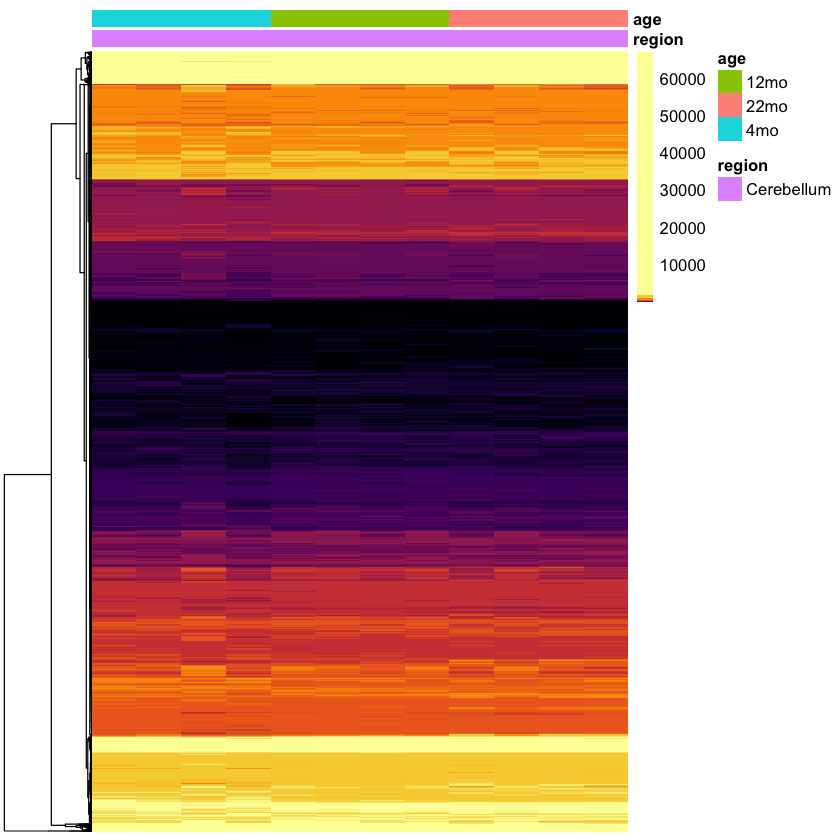

In [117]:
cerrebelum_samples = rownames(metadata)[metadata$region == "Cerebellum"]
pheatmap(GSE62420_genes[,cerrebelum_samples],
         cluster_rows=T,
         cluster_cols=F,
         show_rownames=F,
         show_colnames=F,
         breaks=breaks,
         annotation_col = GSE62420_metadata[,c("region","age")],
         color=inferno(10))

## Striatum

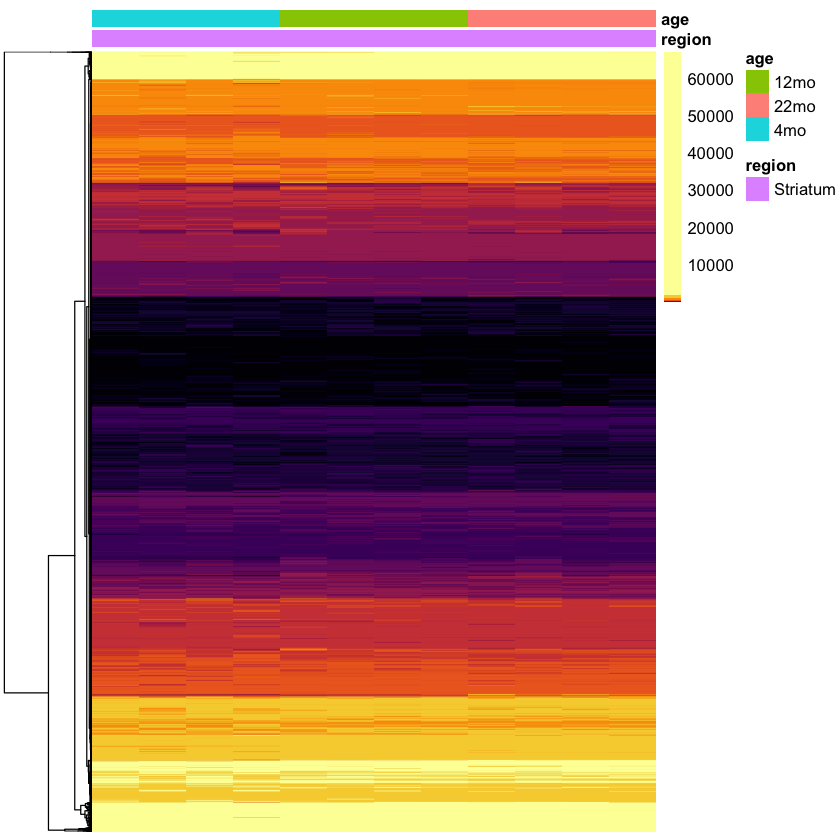

In [120]:
striatum_samples = rownames(metadata)[metadata$region == "Striatum"]
pheatmap(GSE62420_genes[,striatum_samples],
         cluster_rows=T,
         cluster_cols=F,
         show_rownames=F,
         show_colnames=F,
         breaks=breaks,
         annotation_col = GSE62420_metadata[,c("region","age")],
         color=inferno(10))

## Cortex

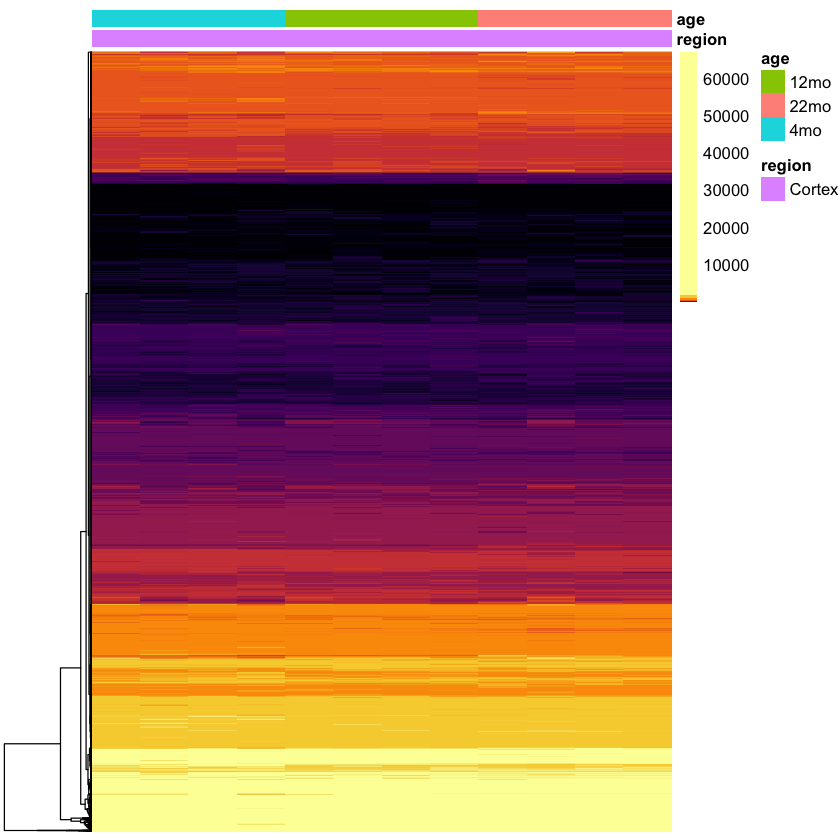

In [121]:
cortex_samples = rownames(metadata)[metadata$region == "Cortex"]
pheatmap(GSE62420_genes[,cortex_samples],
         cluster_rows=T,
         cluster_cols=F,
         show_rownames=F,
         show_colnames=F,
         breaks=breaks,
         annotation_col = GSE62420_metadata[,c("region","age")],
         color=inferno(10))

## Hippocampus

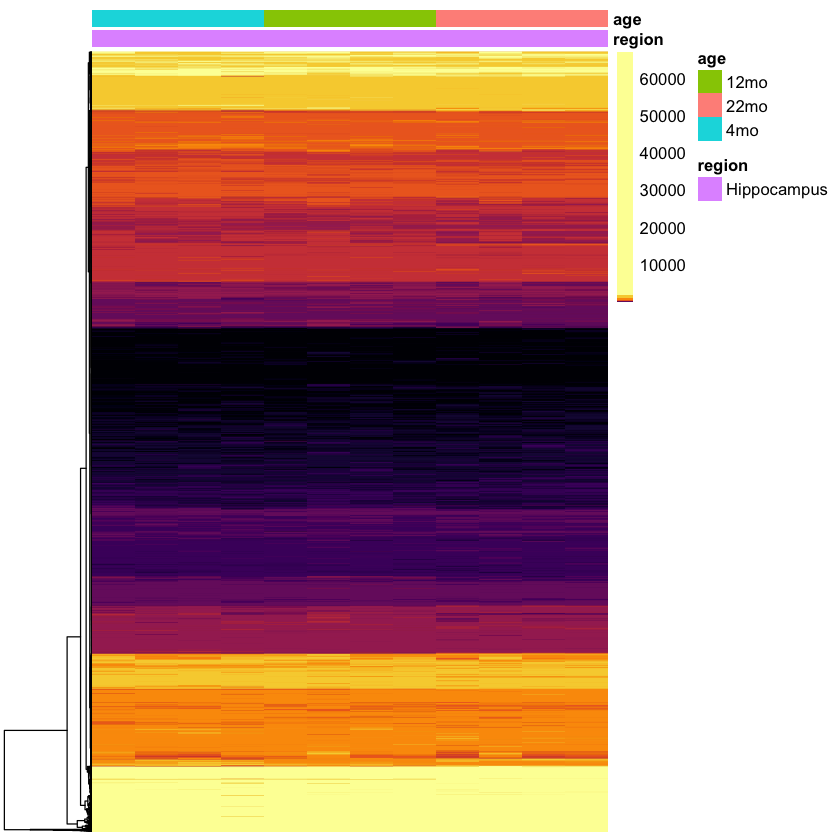

In [122]:
hippocampus_samples = rownames(metadata)[metadata$region == "Hippocampus"]
pheatmap(GSE62420_genes[,hippocampus_samples],
         cluster_rows=T,
         cluster_cols=F,
         show_rownames=F,
         show_colnames=F,
         breaks=breaks,
         annotation_col = GSE62420_metadata[,c("region","age")],
         color=inferno(10))

# Genes differentially expressed in age comparisons

To compare the things together, we need to look at genes differentially expressed for Male and SPF (not Female, not GF). We also need to plot only samples for Male and SPF.

In [126]:
age_type_gender_fc = read.table("../results/dge/age-effect/age_type_gender/fc_deg",
                                sep = "\t",
                                header = T,
                                row.names = 1)
head(age_type_gender_fc)

,X52w.VS.8w..F..SPF.,X52w.VS.8w..F..GF.,X52w.VS.8w..M..SPF.,X52w.VS.8w..M..GF.,X104w.VS.52w..F..SPF.,X104w.VS.52w..F..GF.,X104w.VS.52w..M..SPF.,X104w.VS.52w..M..GF.,X104w.VS.8w..F..SPF.,X104w.VS.8w..F..GF.,X104w.VS.8w..M..SPF.,X104w.VS.8w..M..GF.
Erg28,NA,NA,NA,NA,NA,NA,0.2995864,0.5880348,NA,NA,NA,0.4748921
0610009B22Rik,NA,NA,NA,NA,NA,NA,0.2578338,0.5596664,-0.4851562,NA,NA,0.6158035
0610009L18Rik,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.7641821,NA
0610009O20Rik,0.6702230,0.5741547,NA,NA,-0.6983277,NA,-0.7193424,NA,NA,NA,-0.8507103,-0.6901440
0610010K14Rik,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.3509657,NA
0610012G03Rik,-0.3869422,-0.5346479,NA,NA,NA,0.4999983,NA,0.4632753,-0.4695134,NA,-0.3409655,NA


In [134]:
M_SPF_52w_8w_comp = "X52w.VS.8w..M..SPF."
M_SPF_52w_8w_genes = rownames(age_type_gender_fc)[!is.na(age_type_gender_fc[, M_SPF_52w_8w_comp])]
length(M_SPF_52w_8w_genes)
M_SPF_104w_52w_comp = "X104w.VS.52w..M..SPF."
M_SPF_104w_52w_genes = rownames(age_type_gender_fc)[!is.na(age_type_gender_fc[, M_SPF_104w_52w_comp])]
length(M_SPF_104w_52w_genes)

[1] 367

[1] 3428

In [142]:
# 52w vs 8w
M_SPF_52w_8w_fc = age_type_gender_fc[M_SPF_52w_8w_genes, M_SPF_52w_8w_comp]
names(M_SPF_52w_8w_fc) = M_SPF_52w_8w_genes
M_SPF_52w_8w_fc = M_SPF_52w_8w_fc[order(M_SPF_52w_8w_fc)]
M_SPF_52w_8w_genes = names(M_SPF_52w_8w_fc)
# 104w vs 52w
M_SPF_104w_52w_fc = age_type_gender_fc[M_SPF_104w_52w_genes, M_SPF_104w_52w_comp]
names(M_SPF_104w_52w_fc) = M_SPF_104w_52w_genes
M_SPF_104w_52w_fc = M_SPF_104w_52w_fc[order(M_SPF_104w_52w_fc)]
M_SPF_104w_52w_genes = names(M_SPF_104w_52w_fc)

In [168]:
# Samples
M_SPF_samples = c('SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
            'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
            'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2')
M_SPF_metadata = t(sapply(sapply(M_SPF_samples, strsplit, split = "_"), unlist))
M_SPF_metadata = M_SPF_metadata[,-5]
colnames(M_SPF_metadata) = c("type", "age", "gender", "replicate")
M_SPF_metadata

,type,age,gender,replicate
SPF_8w_M_1_2,SPF,8w,M,1
SPF_8w_M_2_2,SPF,8w,M,2
SPF_8w_M_3_2,SPF,8w,M,3
SPF_8w_M_4_2,SPF,8w,M,4
SPF_52w_M_1_2,SPF,52w,M,1
SPF_52w_M_2_2,SPF,52w,M,2
SPF_52w_M_3_2,SPF,52w,M,3
SPF_52w_M_4_2,SPF,52w,M,4
SPF_52w_M_5_2,SPF,52w,M,5
SPF_104w_M_1_2,SPF,104w,M,1


In [169]:
annot = as.data.frame(M_SPF_metadata[,"age"])
colnames(annot) = c("age")

## 52w vs 8w

In [144]:
# Genes that are differentially expressed in 52w vs 8w and also found with the Affymetrix probes
M_SPF_52w_8w_GSE62420_genes = M_SPF_52w_8w_genes[M_SPF_52w_8w_genes %in% rownames(GSE62420_genes)]

Affymetrix data

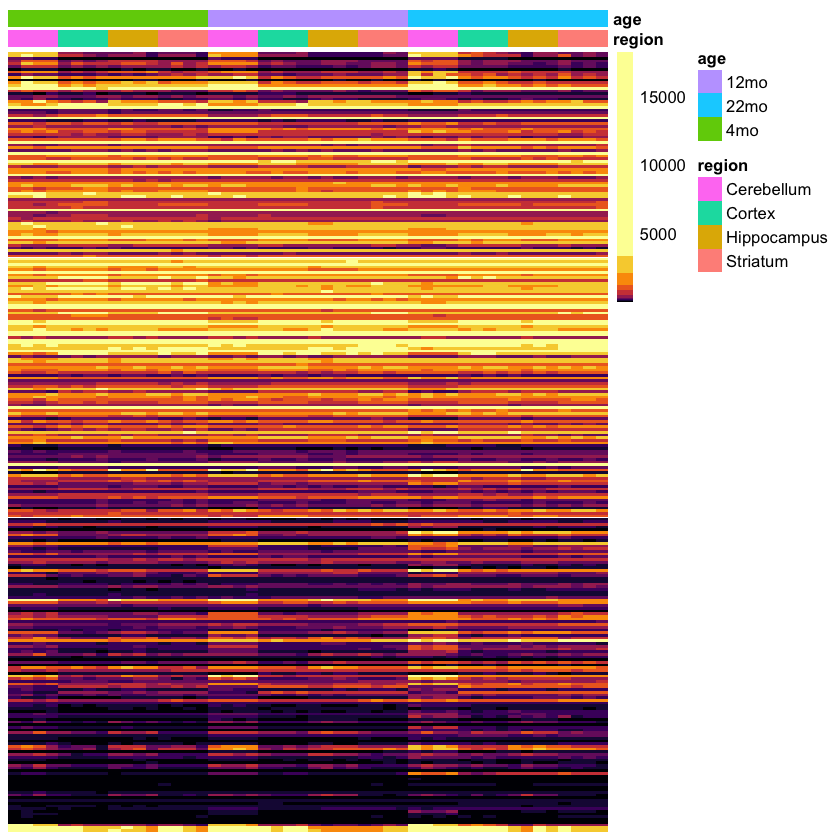

In [165]:
plot_heatmap(GSE62420_genes,
             M_SPF_52w_8w_GSE62420_genes,
             colnames(GSE62420_genes),
             GSE62420_metadata[,c("region","age")])

Our data

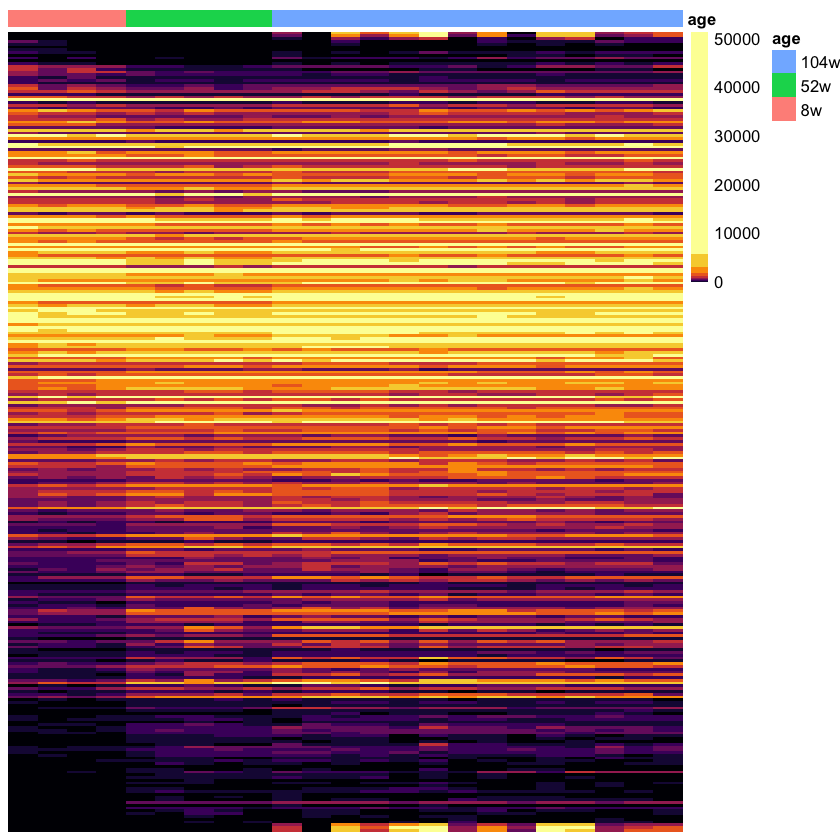

In [167]:
plot_heatmap(norm_counts,
             M_SPF_52w_8w_GSE62420_genes,
             M_SPF_samples,
             annot)

## 104w vs 8w

In [171]:
# Genes that are differentially expressed in 104w vs 52w and also found with the Affymetrix probes
M_SPF_104w_52w_GSE62420_genes = M_SPF_104w_52w_genes[M_SPF_104w_52w_genes %in% rownames(GSE62420_genes)]

Affymetrix data

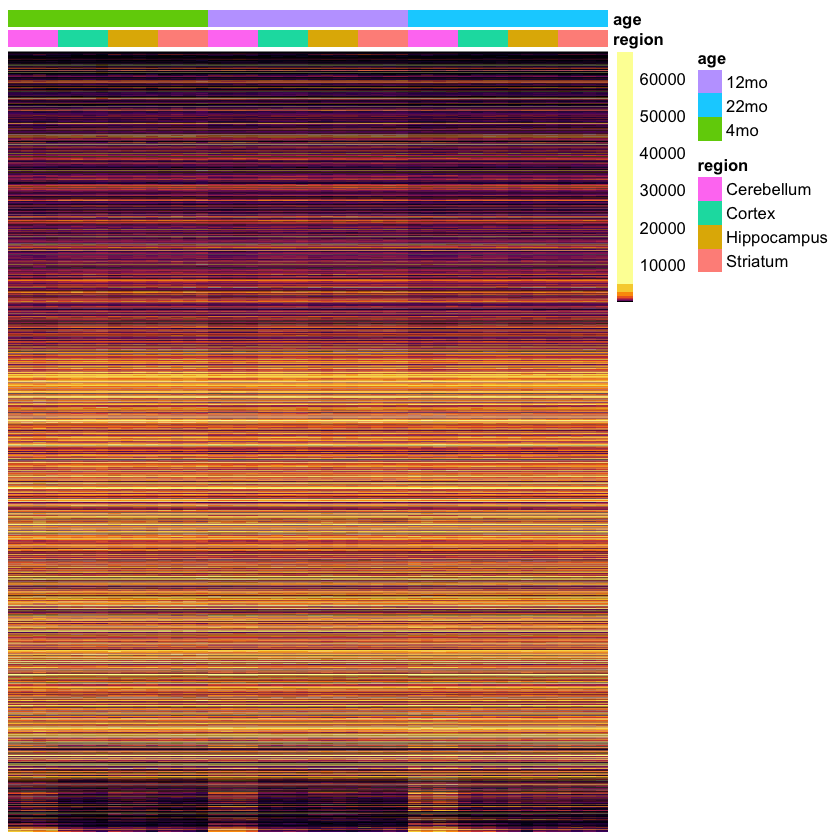

In [172]:
plot_heatmap(GSE62420_genes,
             M_SPF_104w_52w_GSE62420_genes,
             colnames(GSE62420_genes),
             GSE62420_metadata[,c("region","age")])

Our data

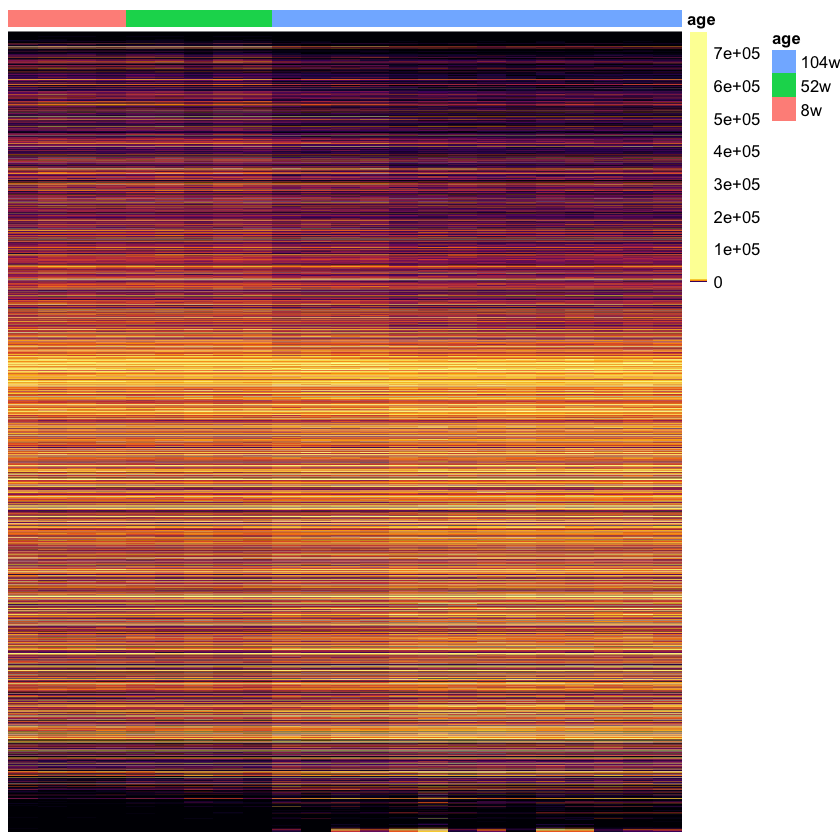

In [173]:
plot_heatmap(norm_counts,
             M_SPF_104w_52w_GSE62420_genes,
             M_SPF_samples,
             annot)